# Rear Tire Cornering Analysis
## R25B 18.0 x 7.5-10 on 7" Rim
### Comparing Different Influences on Tire Load Outputs

In [1]:
import scipy.io as sio
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import copy

import sys
sys.path.append("../")
import data_helpers

### Import tire data files and convert into a Pandas DataFrame

In [2]:
data_files_names = ["../raw_data/tire_data/RunData_10inch_Cornering_Matlab_SI_Round6/B1654run21.mat",
                "../raw_data/tire_data/RunData_10inch_Cornering_Matlab_SI_Round6/B1654run22.mat"]     
   
datas = [sio.loadmat(file_name) for file_name in data_files_names]

df = data_helpers.clean_data(datas)

FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/tire_data/RunData_10inch_Cornering_Matlab_SI_Round6/B1654run21.mat'

### Classify each data point by closest variable sweep. Classification is stored in DataFrame columns 'load', 'camber', 'pressure', and 'velocity'

In [3]:
variable_sweeps = {"load" : {"sweep" : np.array([-250, -200, -150, -100, -50]) / 0.224809, "label" : "FZ" },
                    "camber" : {"sweep" : np.array([0, 2, 4]), "label" : "IA"},
                    "pressure" : {"sweep" : np.array([8, 10, 12, 14]) * 6.89476, "label" : "P"},
                    "velocity" : {"sweep" : np.array([15, 25, 45]) * 1.60934, "label" : "V"}}

for variable, info in variable_sweeps.items():
    temp_nearest_func = lambda x: data_helpers.get_nearest_value(info["sweep"], x)
    df[variable] = df[info["label"]].apply(temp_nearest_func)

### Look at distribution of samples on variable sweeps

In [4]:
for variable, info in variable_sweeps.items():
    count = df.groupby([variable])[variable].count()
    variable_sweeps[variable]["count"] = count
    print(count, "\n")

load
-1112.055122    28070
-889.644098     21787
-667.233073     21736
-444.822049     21733
-222.411024     21734
Name: load, dtype: int64 

camber
0    51134
2    31962
4    31964
Name: camber, dtype: int64 

pressure
55.15808    20461
68.94760    20453
82.73712    53696
96.52664    20450
Name: pressure, dtype: int64 

velocity
24.1401      6394
40.2335    102276
72.4203      6390
Name: velocity, dtype: int64 



### Comparing lateral force and self aligning moment against slip angle for different pressures. Holds camber, velocity, and load constant by choosing most commonly used value.

In [5]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable is not "pressure":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-5-ab00b035d559>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if variable is not "pressure":


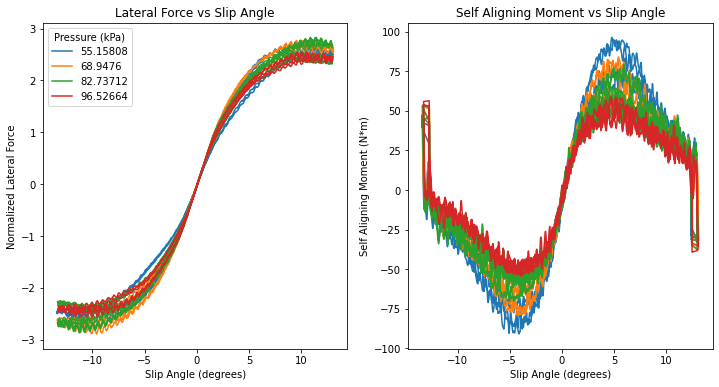

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["pressure"]["sweep"], title = "Pressure (kPa)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["pressure"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, it is clear the 82.74 kPa (12 psi) pressure is optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different cambers. Holds pressure, velocity, and load constant by choosing most commonly used value.

In [7]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable is not "camber":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-7-c66990121687>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if variable is not "camber":


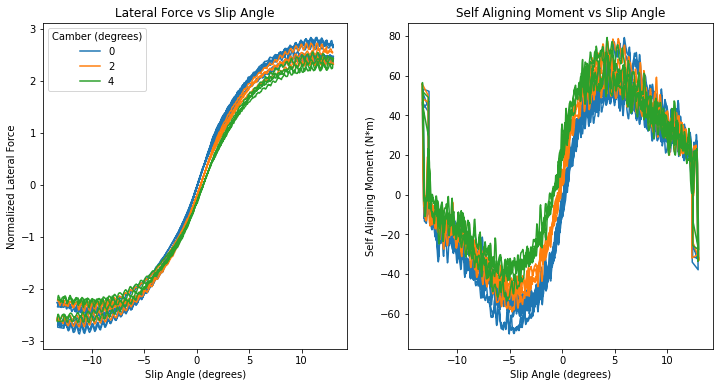

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["camber"]["sweep"], title = "Camber (degrees)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["camber"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

Based on this graph, the closer the camber is to zero, the more optimal for the tire because it maximizes lateral force

### Comparing lateral force and self aligning moment against slip angle for different velocities. Holds pressure, camber, and load constant by choosing most commonly used value.

In [9]:
temp_df = copy.copy(df)
for variable, info in variable_sweeps.items():
    if variable is not "velocity":
        temp_df = temp_df[temp_df[variable] == info["count"].idxmax()]

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-9-aed95f1539a2>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if variable is not "velocity":


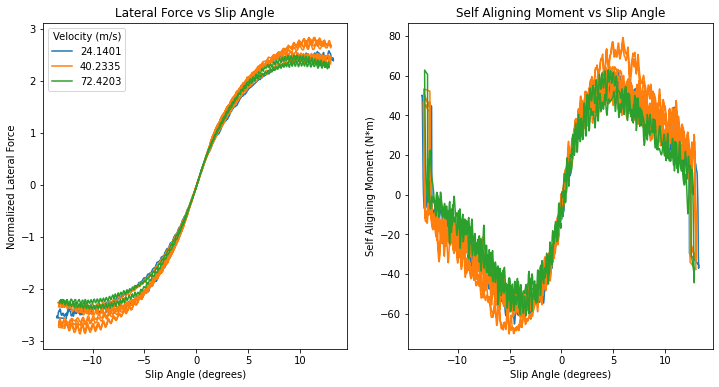

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)

for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["NFY"])
plt.legend(variable_sweeps["velocity"]["sweep"], title = "Velocity (m/s)")
plt.title("Lateral Force vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Normalized Lateral Force")

plt.subplot(1, 2, 2)
for i, g in temp_df.groupby(["velocity"]):
    plt.plot(g["SA"], g["MZ"])
plt.title("Self Aligning Moment vs Slip Angle")
plt.xlabel("Slip Angle (degrees)")
plt.ylabel("Self Aligning Moment (N*m)")

plt.show()

In [11]:
pd.set_option('display.max_columns', None)
for i, g in temp_df.groupby(["velocity"]):
    h = g[(g["SA"] > 9.98) & (g["SA"] <= 10)]
    print(h.head(), "\n")   

             ET      V       N     SA     IA      RL      RE      P     FX  \
45001  1300.037  24.23  284.93  9.984 -0.033  21.148  22.195  83.59 -21.50   
45140  1301.427  24.25  287.25  9.987 -0.022  21.075  22.093  83.08  -1.04   

            FY       FZ     MX     MZ   NFX   NFY    RST   TSTI   TSTC   TSTO  \
45001 -2710.77 -1113.70  41.69  25.06  0.02  2.43  32.50  48.49  49.32  46.29   
45140 -2717.87 -1110.53  40.74  30.69  0.00  2.45  32.73  53.39  55.43  46.23   

       AMBTMP     SR   SL  RUN         load  camber  pressure  velocity  
45001   28.58 -0.047 -0.0   22 -1112.055122       0  82.73712   24.1401  
45140   28.59 -0.046 -0.0   22 -1112.055122       0  82.73712   24.1401   

            ET      V       N     SA     IA      RL      RE      P     FX  \
245    270.050  40.30  475.17  9.982 -0.034  21.252  22.144  83.64 -25.32   
5358   387.050  40.30  475.51  9.999 -0.033  21.236  22.127  84.19 -21.39   
5494   388.410  40.33  477.83  9.993 -0.031  21.149  22.075  82.83